### GPU Checking

In [ ]:
!nvidia-smi

Wed Jan 29 09:58:10 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Working Directory

In [9]:
import os
HOME = os.getcwd()
print(HOME)

/content


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

## Install YOLO11 via Ultralytics

In [10]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.3/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

This code sets up a directory for datasets, installs the Roboflow library, and downloads a tree detection dataset in YOLOv11 format using the provided API key. It prepares the environment for working with the dataset in Google Colab.



In [11]:
# Create a directory for datasets in the current working directory
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Install the Roboflow library to facilitate dataset downloading
!pip install roboflow

# Import Roboflow and initialize with your API key
from roboflow import Roboflow
rf = Roboflow(api_key="z0ZjC0t4ZSOQoc2Bmm2n")

# Access the specific project and version from Roboflow workspace
project = rf.workspace("ghost-8jb1k").project("tree-detection-model-0u7tb")
version = project.version(1)

# Download the dataset in YOLOv11 format
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tree-detection-model-1 in yolov11:: 100%|██████████| 2034/2034 [00:00<00:00, 2066.98it/s]


## Train YOLOv11 Model

It trains a YOLOv11 object detection model using the specified dataset for 50 epochs with an image size of 500x500

In [12]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=500 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/tree-detection-model-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

# Results Directory

The results of the completed training are saved in `{HOME}/runs/detect/train/`.

In [13]:
!ls {HOME}/runs/detect/train3/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1738178003.5da68cbd19db.6952.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1840.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1841.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1842.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


# Confusion Matrix from Training Results

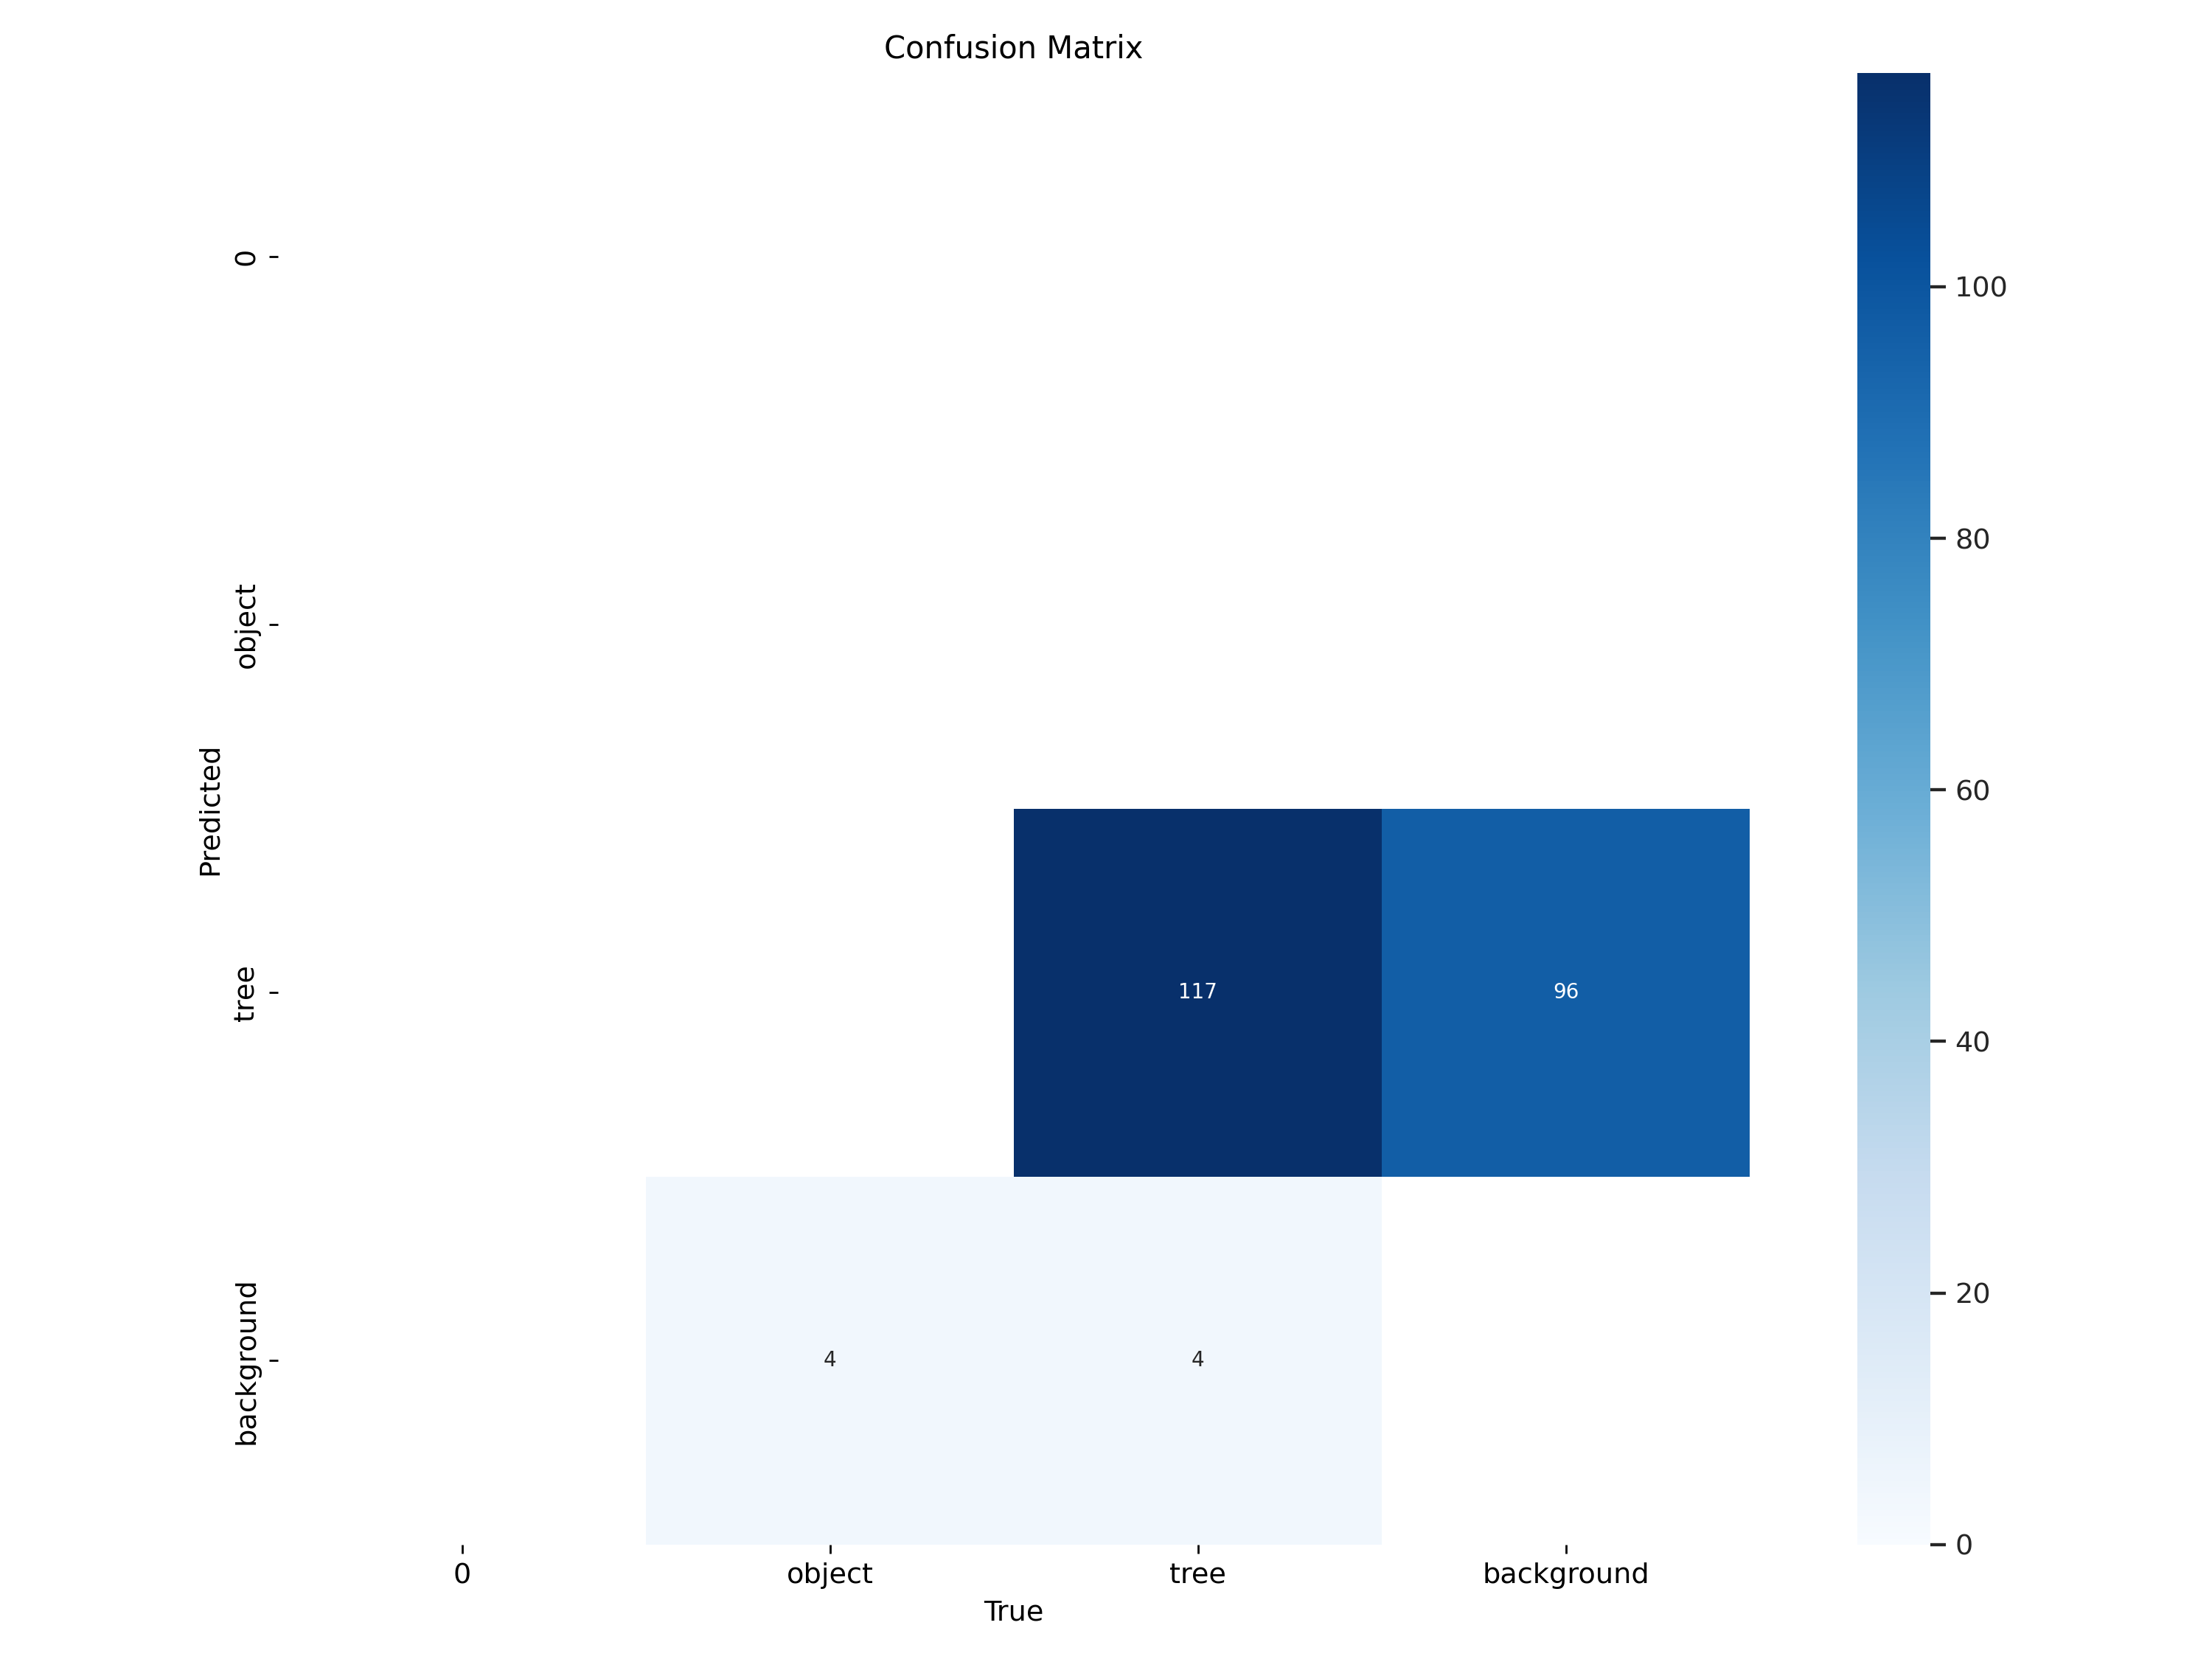

In [17]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=900)

The confusion matrix simplifies a classification problem, likely for object detection or image segmentation. It includes:


*   Predicted: Model's predictions for objects or background.
*   Background: Model's prediction of background regions.
*   True: Ground truth labels, indicating actual background.
*   Background: Repetition emphasizing the background class.

# Training Results Visualization


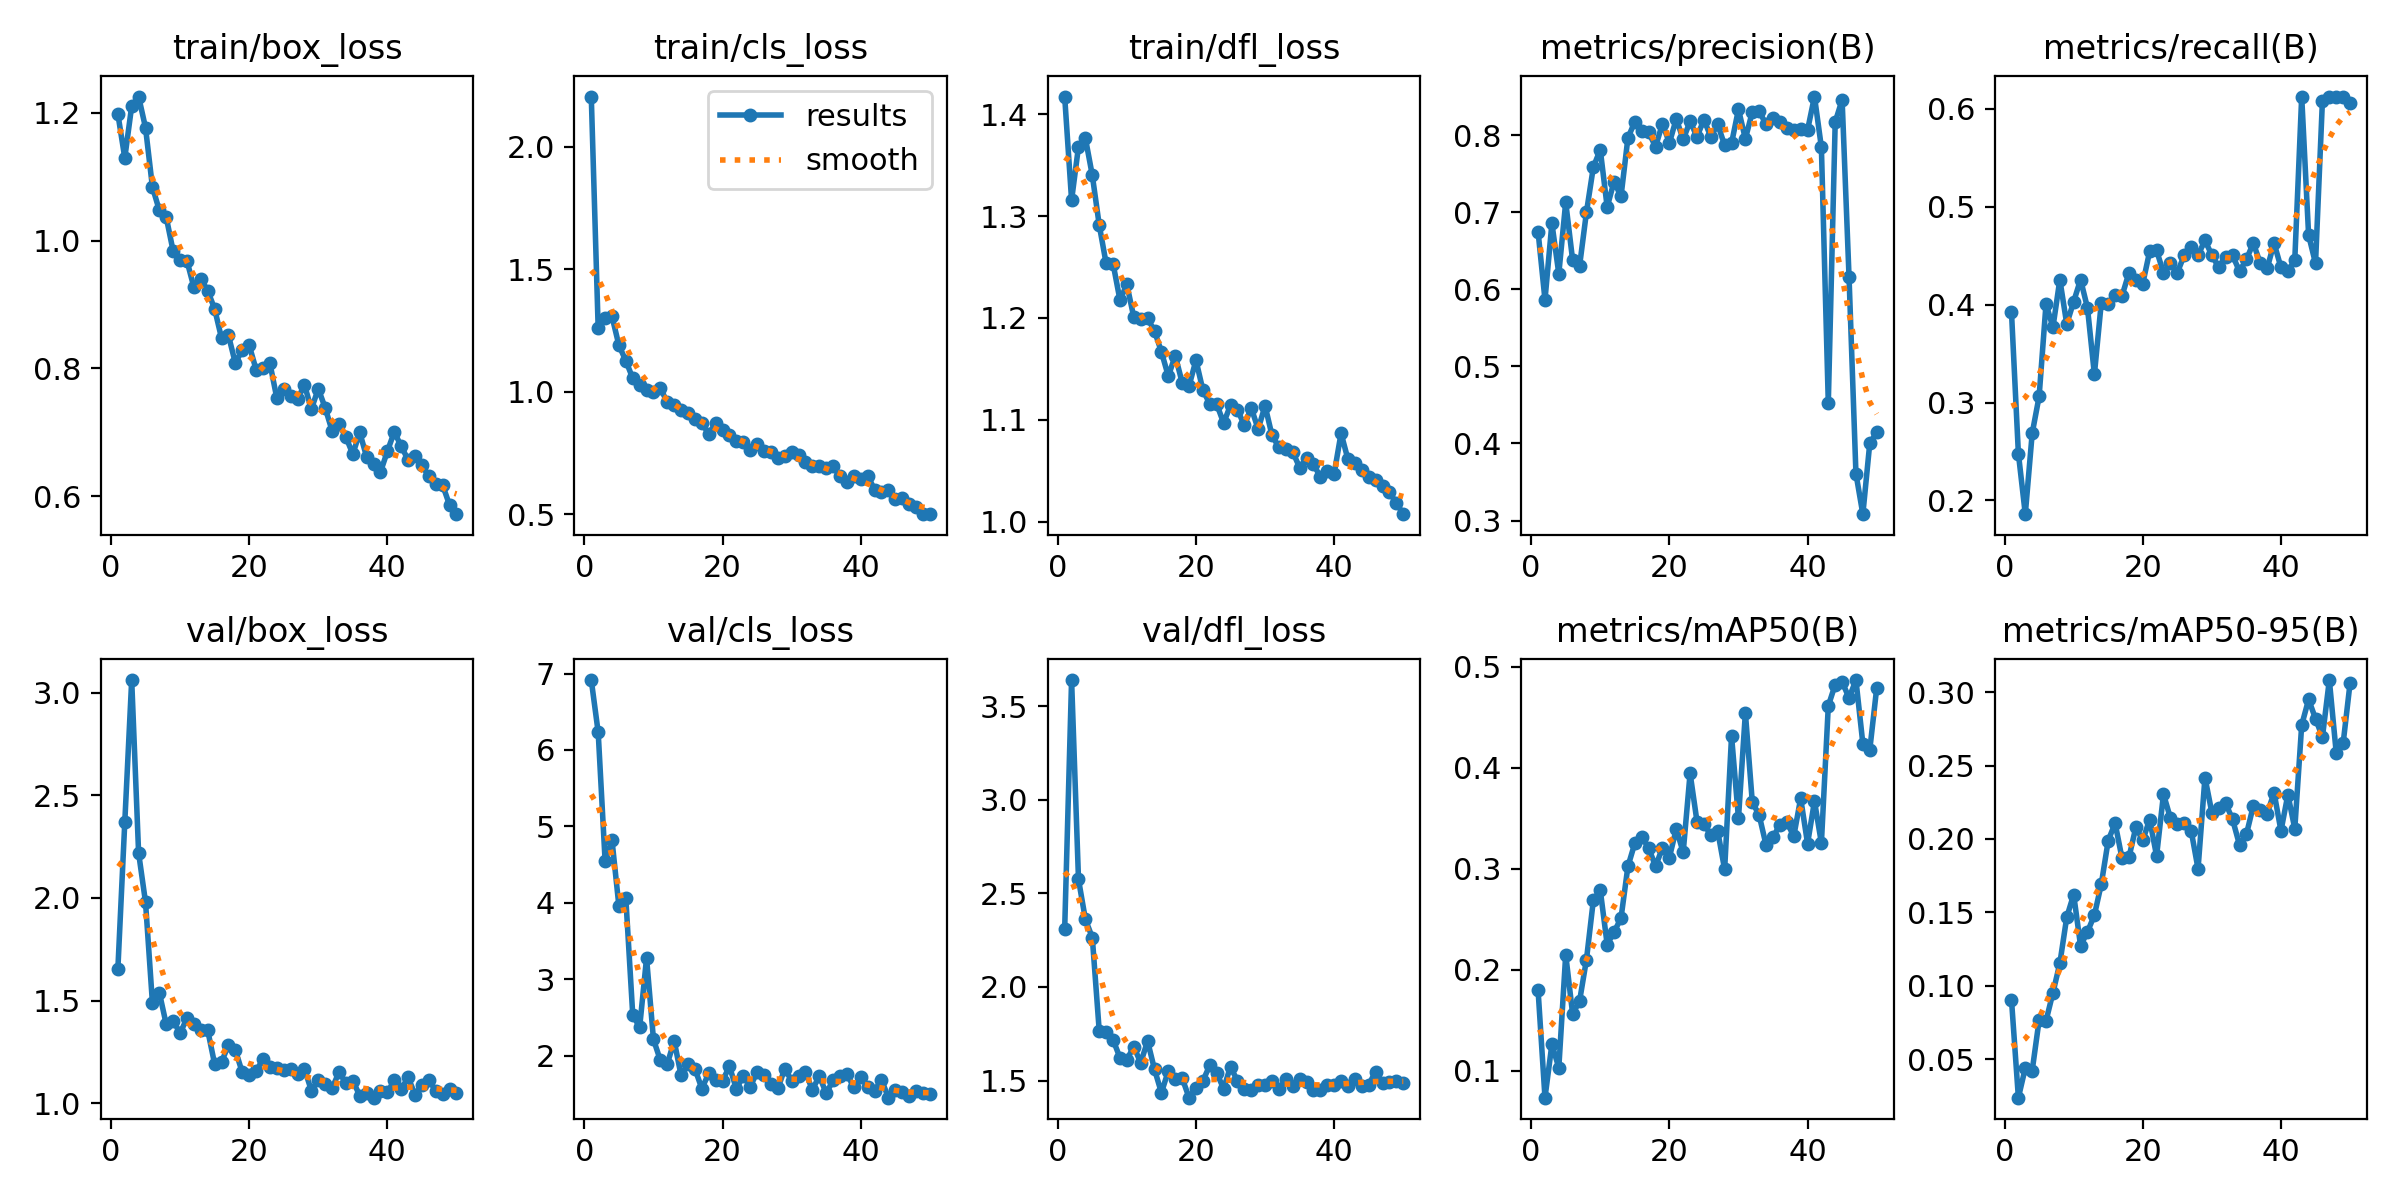

In [18]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/results.png', width=900)



1.   Training Losses: Box, class, and DFL losses show prediction errors during training.

2.   Validation Losses: Similar to training but evaluated on the validation set.

3.   Precision/Recall: Measures accuracy and detection capability of the model.

4.   mAP: Evaluates object detection performance at different IoU thresholds.

5.   Epoch Trends: Metrics plotted over 40 epochs to track model improvement.



# Validation Predictions

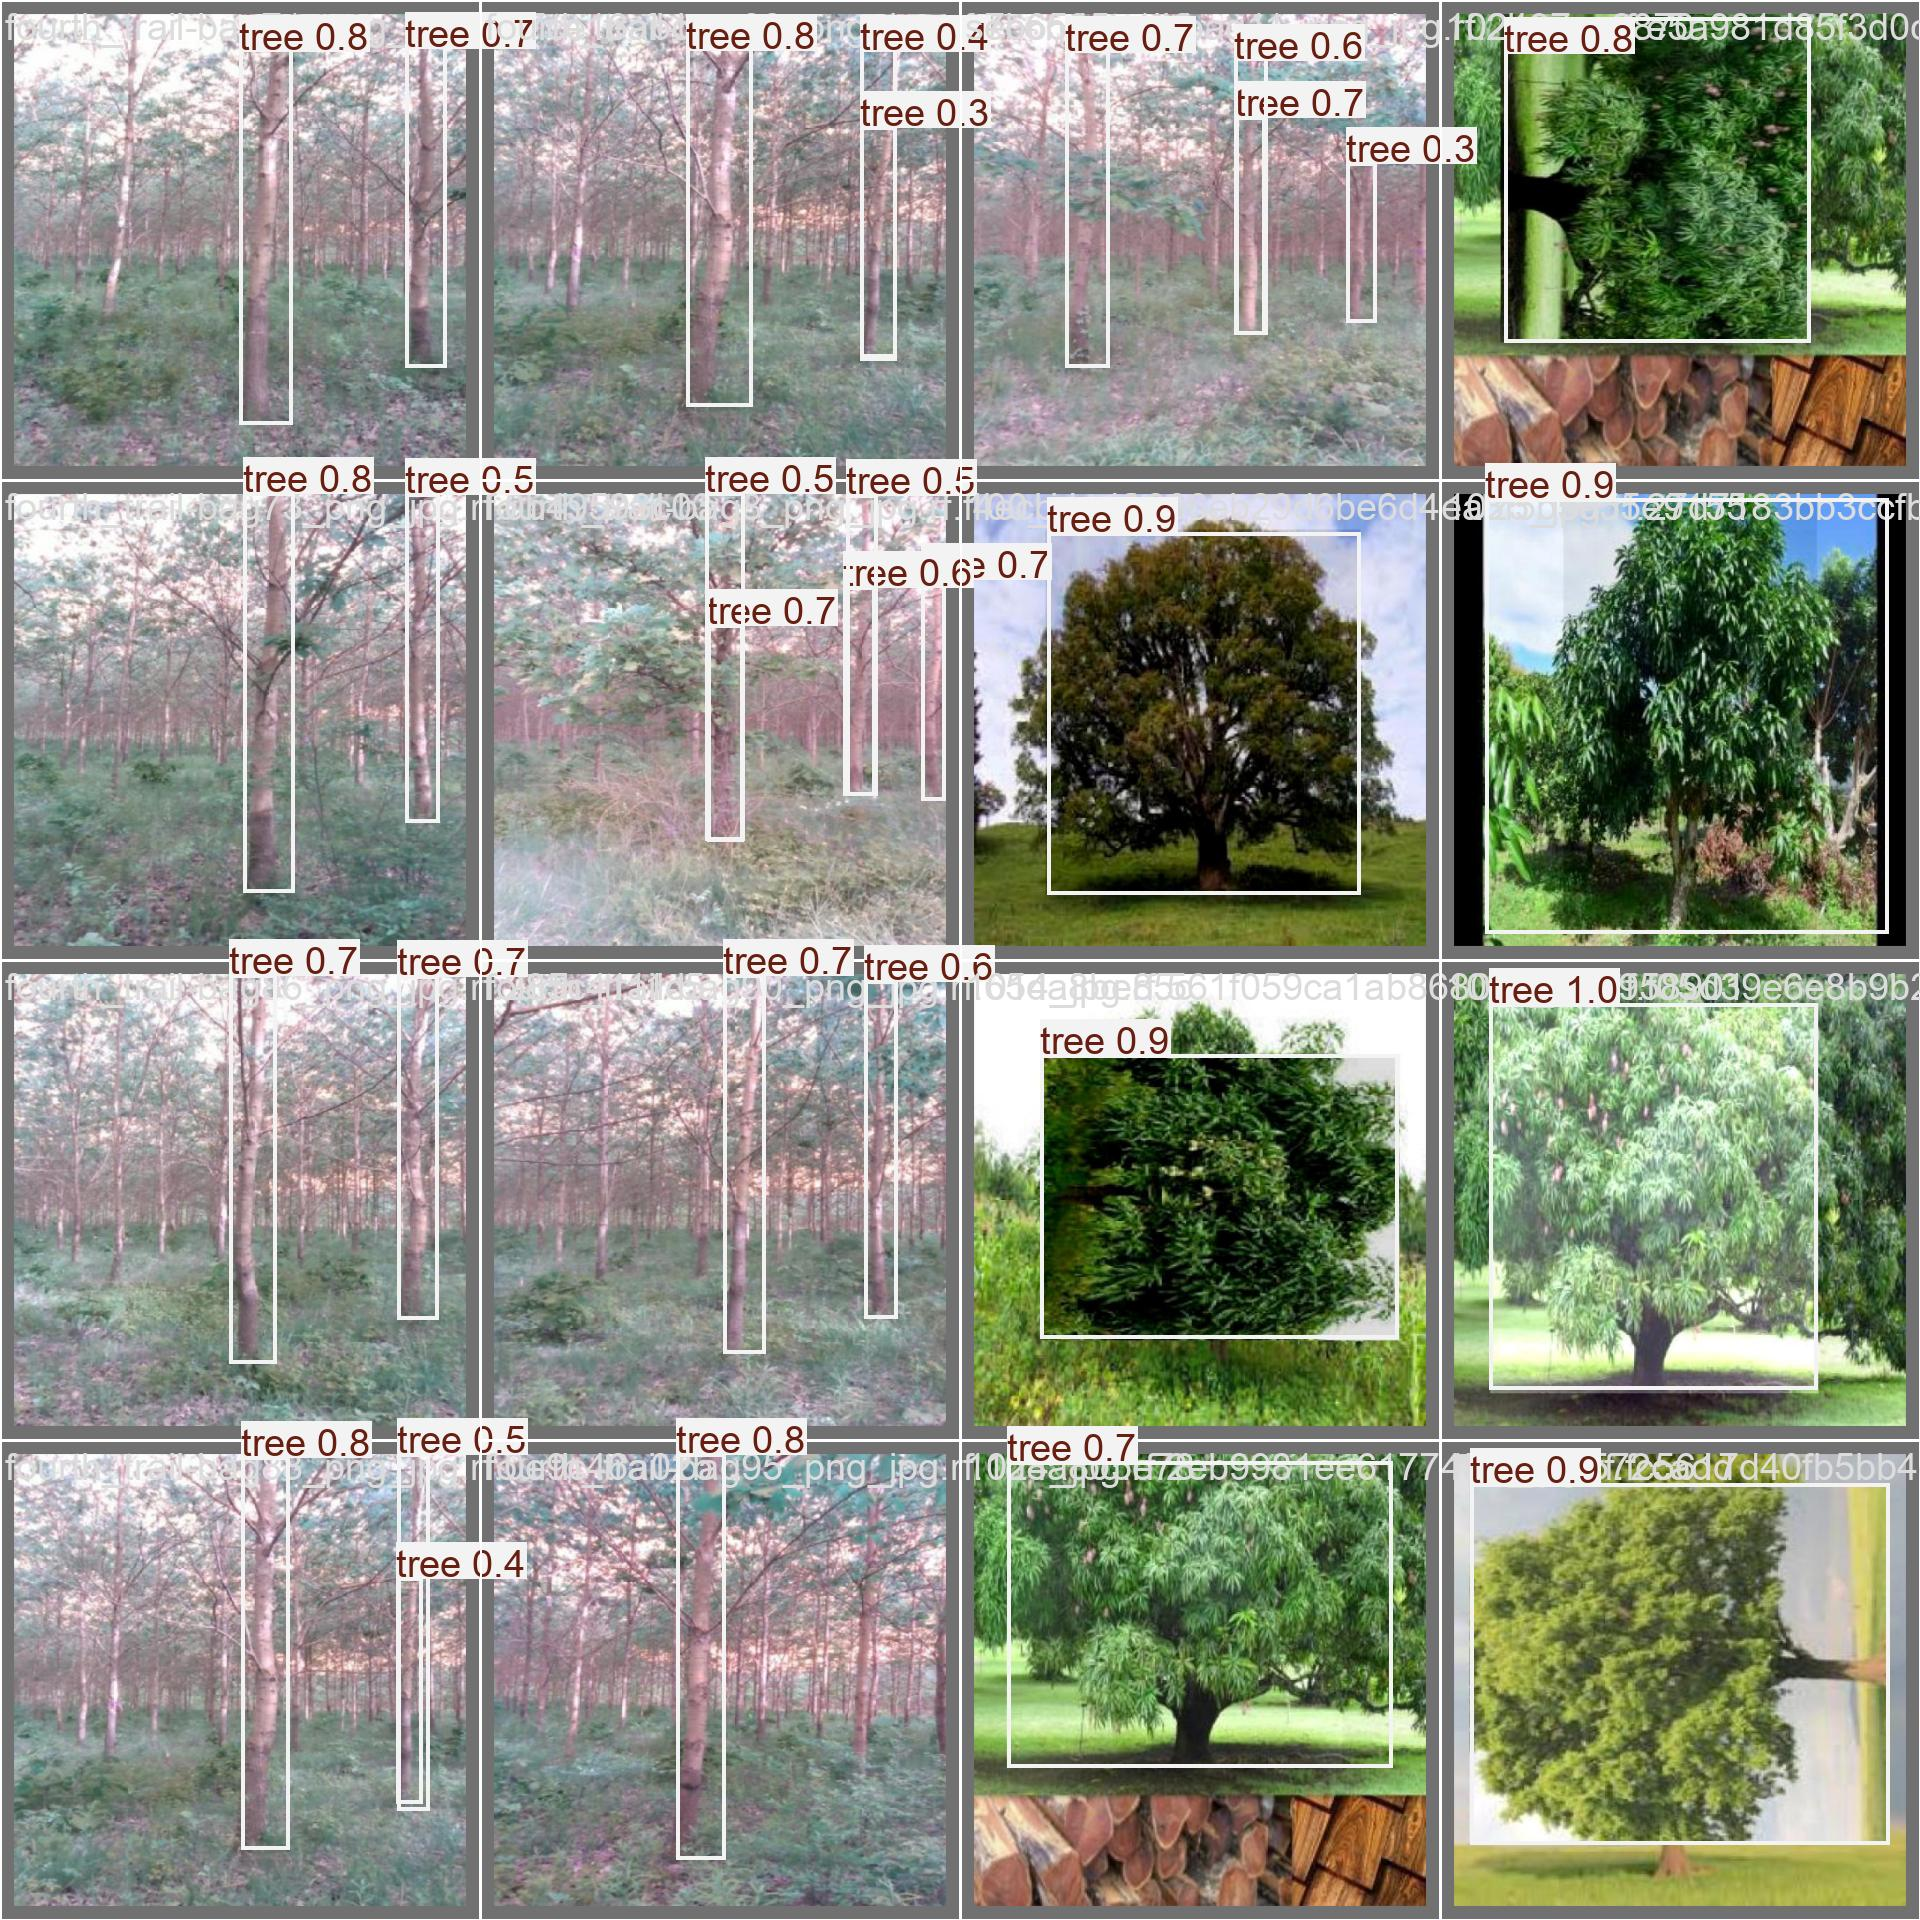

In [25]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=1000)

## Validate Fine-Tuned Model


In [20]:
!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/tree-detection-model-1/valid/labels.cache... 126 images, 36 backgrounds, 0 corrupt: 100% 126/126 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 125. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:03<00:00,  2.01it/s]
                   all        126        125      0.363      0.613      0.486      0.309
                object          4          4      0.284       0.25      0.251      0.149
                  tree         86        121      0.442      0.975      0.722      0.469
Speed: 4.6ms preprocess, 7



*   Model: YOLO11s, 9.4M params, 21.3 GFLOPs.

*   Dataset: 126 images, 125 instances.

*   Metrics:

       1. Precision: 0.363

       2. Recall: 0.613

       3. mAP50: 0.486

*   Tree Detection: High recall (0.975), mAP50 0.722.

*   Speed: 7.5ms inference per image.

*   Results: Saved to runs/detect/val.



## Predicting Objects with Trained Model

In [21]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/154 /content/datasets/tree-detection-model-1/test/images/1003_jpg.rf.39ace1e7911e0e7c488293c8bfec1553.jpg: 512x512 1 tree, 17.4ms
image 2/154 /content/datasets/tree-detection-model-1/test/images/1025_jpg.rf.6e534c8a4aab367dad8e21b2d905d1b0.jpg: 512x512 2 trees, 11.2ms
image 3/154 /content/datasets/tree-detection-model-1/test/images/1028_jpg.rf.75c3e6823e3999a10754e42c25c800a7.jpg: 512x512 1 tree, 11.1ms
image 4/154 /content/datasets/tree-detection-model-1/test/images/1029_jpg.rf.17c502fe513f59d8afbe943fe0a45a99.jpg: 512x512 1 tree, 16.1ms
image 5/154 /content/datasets/tree-detection-model-1/test/images/1034_jpg.rf.1bafebd5744ec7ce9108f5f427752bc8.jpg: 512x512 1 tree, 16.2ms
image 6/154 /content/datasets/tree-detection-model-1/test/images/1038_jpg.rf.acbdbee6070aec87b9459c115870d02c.jpg: 512x512 1 tree, 12.7ms
imag

# Latest Prediction Results

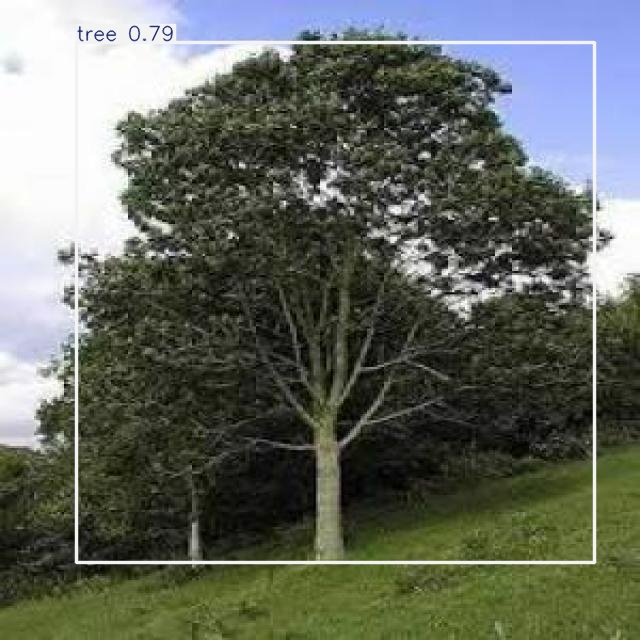

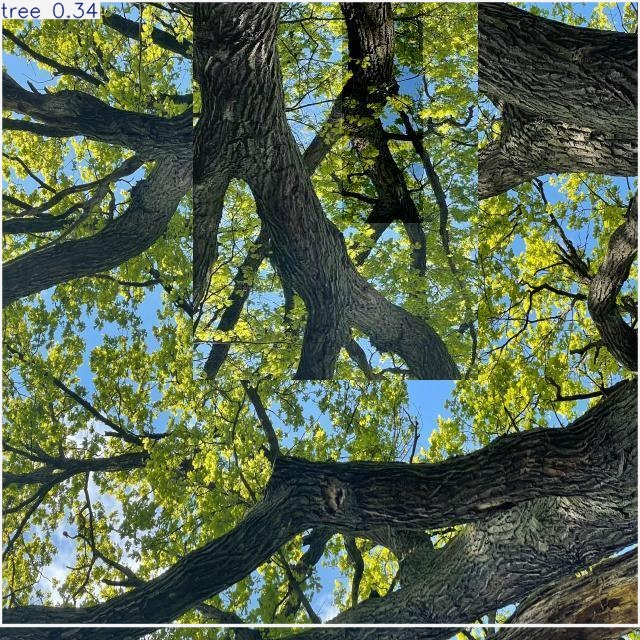

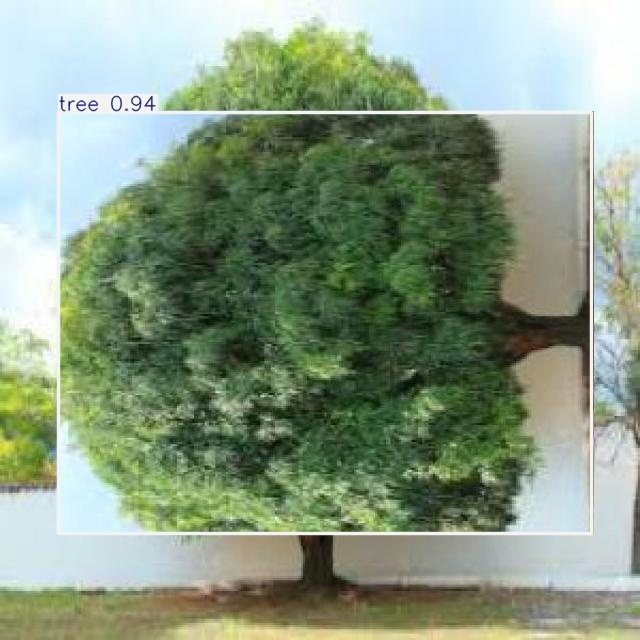

In [27]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=700))
    print("\n")

## Export Model to TensorFlow.js Format


In [28]:
!yolo export task=detect model={HOME}/runs/detect/train3/weights/best.pt format=tfjs save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train3/weights/best.pt' with input shape (1, 3, 512, 512) BCHW and output shape(s) (1, 7, 5376) (18.3 MB)
E0000 00:00:1738179162.695269   12012 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738179162.701706   12012 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 3.2s, saved as '/content/runs/detect/train3/weights/best.onnx' (36.1 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
I0000 00:0

## Compress the TensorFlow.js Model


It can be conveniently downloaded from the compressed ZIP file.

In [29]:
import shutil

folder_path = "/content/runs/detect/train/weights/best_web_model"
zip_path = "./tfjs_model.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

'/content/tfjs_model.zip'